<a href="https://colab.research.google.com/github/harishmuh/machine_learning_practices/blob/main/KNN_tutorial_white_wine_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-Nearest Neighbor**

A simple but powerful approach for making predictions is to use the most similar historical examples to the new data. This is the principle behind the k-Nearest Neighbors algorithm. Similarity between records can be measured many different ways. A problem or data-specific method can be used. Generally, with tabular data, a good starting point is the Euclidean distance.

This k-Nearest Neighbors tutorial is broken down into 3 parts:

- **Step 1**: Calculate Euclidean Distance.
- **Step 2**: Get Nearest Neighbors.
- **Step 3**: Make Predictions.

These steps will teach you the fundamentals of implementing and applying the k-Nearest Neighbors algorithm for classification and regression predictive modeling problems.

#### **Calculate Distance**

The first step is to calculate the distance between two rows in a dataset.

Rows of data are mostly made up of numbers and an easy way to calculate the distance between two rows or vectors of numbers is to draw a straight line.

We can calculate the straight line distance between two vectors using the Euclidean distance measure. It is calculated as the square root of the sum of the squared differences between the two vectors.

$$ d = \sqrt{\sum_{j=1}^p (x1_j-x2_j)^2}$$

Where:
- x1 is the first row of data,
- x2 is the second row of data and
- j is the index to a specific column as we sum across all columns.

With Euclidean distance, the smaller the value, the more similar two records will be. A value of 0 means that there is no difference between two records

In [1]:
import numpy as np

test = [12, 15, 16]
train = [12, 16, 17]

def euclidean_distance(train, test):

    distance_square = 0.0
    for i in range(len(test)):
        distance_square += (test[i] - train[i])**2

    distance = np.sqrt(distance_square)
    return distance

euclidean_distance(test, train)

np.float64(1.4142135623730951)

#### **Get Nearest Neighbor**

To locate the neighbors for a new piece of data within a dataset we must first calculate the distance between each record in the dataset to the new piece of data. We can do this using our distance function prepared above. Once distances are calculated, we must sort all of the records in the training dataset by their distance to the new data. We can then select the top k to return as the most similar neighbors.


In [2]:
train = [
    [12, 16, 17, 1],
    [20, 13, 18, 1],
    [9, 14, 18, 0],
    [17, 15, 20, 1]
]

test = [12, 15, 16]


def get_neighbors(train, test, num_neighbors):
    distances = []

    for train_row in train:
        dist = euclidean_distance(train_row, test)
        distances.append((train_row, dist))
        distances.sort(key=lambda x: x[1])

    neighbors =[]
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])

    return neighbors

get_neighbors(train, test, 3)

[[12, 16, 17, 1], [9, 14, 18, 0], [17, 15, 20, 1]]

#### **Make Prediction**

The most similar neighbors collected from the training dataset can be used to make predictions. In the case of classification, we can return the most represented class among the neighbors.


In [3]:
def predict_classification(train, test, num_neighbors):
    neighbors = get_neighbors(train, test, num_neighbors)
    ouput_value = [row[-1] for row in neighbors]
    prediction =max(set(ouput_value), key=ouput_value.count)
    return prediction

predict_classification(train, test, 3)

1

In [4]:
train = [
    [12, 16, 17, 0],
    [20, 13, 18, 1],
    [9, 14, 18, 0],
    [17, 15, 20, 1],
    [18, 19, 19, 0],
    [21, 14, 18, 1]
]

test = [15, 17, 19]

predict_classification(train, test, 3)

0

#### **Scikit-learn Implementation**

**Importing Libraries**

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

### `Business Problem Understanding`

**Problem Statement**

Wine quality classification is a challenging task because taste is the least perceptible of the human senses. Good wine quality prediction can be very useful in the certification stage, as currently, sensory analysis is performed by humans through tasting, which is a subjective approach.

**Goals**

Determine wine quality based on alcohol and density.

**Analytic Approach**
Therefore, we need to analyze the data to find patterns in the features that differentiate one wine from another.

Next, we will build a classification model that will help companies provide quality prediction tools for new wines, which will be useful for determining wine prices.

**Metric Evaluation**

The evaluation metric used is accuracy. The higher the value, the more accurate the model is in labeling wine quality based on the limitations of the features used.

### `Data Understanding`

In [6]:
white_wine_csv = 'https://raw.githubusercontent.com/harishmuh/machine_learning_practices/refs/heads/main/datasets/white_wine.csv'
data = pd.read_csv(white_wine_csv)[['alcohol', 'density', 'quality']]
print(f'Number of rowd and columns {data.shape}')
data.head()

Number of rowd and columns (520, 3)


,alcohol,density,quality
0,8.8,1.0010,6.0
1,9.5,0.9940,6.0
2,10.1,0.9951,6.0
3,9.9,0.9956,6.0
4,9.9,0.9956,6.0


In [7]:
pd.DataFrame({
    'feature': data.columns.values,
    'data_type': data.dtypes.values,
    'null': data.isna().mean().values * 100,
    'negative': [True if data[col].dtype == int and (data[col] < 0).any() else False for col in data.columns],
    'n_unique': data.nunique().values,
    'min': data.min().values,
    'max': data.max().values,
    'sample_unique': [data[col].unique() for col in data.columns]
})

,feature,data_type,null,negative,n_unique,min,max,sample_unique
0,alcohol,float64,0.192308,False,45,8.5000,12.9000,"[8.8, 9.5, 10.1, 9.9, 9.6, 11.0, 12.0, 9.7, 10..."
1,density,float64,0.000000,False,100,0.9899,1.0033,"[1.001, 0.994, 0.9951, 0.9956, 0.9949, 0.9938,..."
2,quality,float64,0.192308,False,6,3.0000,8.0000,"[6.0, 5.0, 7.0, 8.0, 4.0, 3.0, nan]"


**Insight**

- Dataset terdiri dari 520 baris dan 12 kolom.
- Semua variabel tergolong numerikal dan continous, kecuali quality yaitu diskrit
- Format data dari variabel quality seharusnya integer
- Skala dari variabel total sulfur dioxide dan free sulfur dioxide lebih besar dibanding yang lain.

### `Data Preparation`

`Duplicates`

**Duplicated Value**, Deteksi dan kuantifikasi duplikasi data

In [8]:
print(f'Number of duplicate data: {data.duplicated().sum()}')
print(f'Percentage of duplicate data: {data.duplicated().sum()/len(data)*100:.2f}')

Number of duplicate data: 115
Percentage of duplicate data: 22.12


As much as 22% of the data is indicated as duplicate, so remove one of them.

Handling duplicated data:

In [9]:
data.drop_duplicates(inplace=True, ignore_index=True)

`Missing Values`

Missing value detection and quantification

In [10]:
data.isna().sum().to_frame(name='missing_value')

,missing_value
alcohol,1
density,0
quality,1


Two variables (alcohol, quality) contain 1 data point or 0.2% missing value.

Handling missing value:

In [11]:
data.dropna(inplace=True)

`Rare Labels`

Rare value detection and quantification:

In [12]:
data['quality'].value_counts(normalize=True)*100

,proportion
quality,
6.0,45.049505
5.0,31.435644
7.0,15.099010
4.0,4.207921
8.0,3.217822
3.0,0.990099


More than 50% is dominated by wines with a quality of more than 6.

Handling rare value:

In [13]:
data['quality'] = np.where(data['quality']>6, 1, 0)

`Outliers`

Outlier detection and quantification:

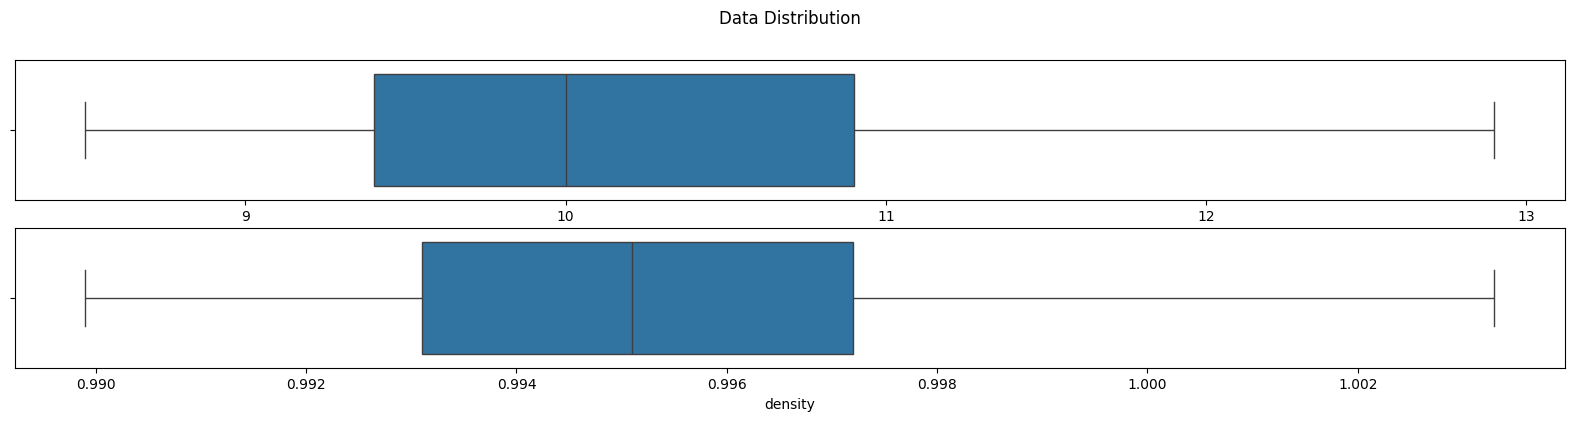

In [14]:
fig, axes = plt.subplots(2, 1, figsize=(20, 4))

sns.boxplot(data=data, x='alcohol', ax=axes[0])
sns.boxplot(data=data, x='density', ax=axes[1])

axes[0].set_title("Data Distribution", y=1.2)
plt.show()


There are no outliers in the density variable.

`Imbalance Data`

Detection and quantification of target label proportion

In [15]:
data['quality'].value_counts(normalize=True)

,proportion
quality,
0,0.816832
1,0.183168


The percentage of label 0 (81.6%) is more than label 1 (18.2%). This case is considered as imbalanced data.

`Check Multicollinearity`

Detecting multicollinearity between features with VIF.

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data.drop(columns='quality')
y = data['quality']

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Feature"] =  X.columns

vif.round(2)

,VIF Factor,Feature
0,88.56,alcohol
1,88.56,density


There is multicollinearity between the alcohol and density features. When using a linear model, multicollinearity should be avoided. However, for this case study, we will maintain this features.

**Feature Engineering**

Split the dataset into train and test sets.

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

X_train.shape, X_test.shape

((282, 2), (122, 2))

### `Model Experiment`

Setting basic parameters to initialize the experiment and create a transformation pipeline

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler

# create Column Transformer
transformer = ColumnTransformer([
    ('scaler', RobustScaler(), ['alcohol', 'density'])
], remainder='passthrough')

# fit and transform using the transformer
X_train_scale = transformer.fit_transform(X_train)
X_test_scale = transformer.transform(X_test)

**Benchmark Model**

`Without Scaling`

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# define model
estimator = KNeighborsClassifier(metric='euclidean')

# fitting model
estimator.fit(X_train, y_train)

# predict to test set
y_pred_test = estimator.predict(X_test)

# evaluate
print(f'Model accuracy score in the test set: {accuracy_score(y_test, y_pred_test):.3f}')

Model accuracy score in the test set: 0.893


`With Scaling`

In [20]:
# define model
estimator = KNeighborsClassifier(metric='euclidean')

# fitting model
estimator.fit(X_train_scale, y_train)

# predict to test set
y_pred_test = estimator.predict(X_test_scale)

# evaluate
print(f'Model accuracy score in the test set: {accuracy_score(y_test, y_pred_test):.3f}')

Model accuracy score in the test set: 0.967


- KNN requires scaling

**Model Selection**

In [21]:
# Declare list to hold a result
training_accuracies = []
testing_accuracies = []

# Specify the number of k iteration
k = range(1, 50, 2)

for i in k:

    # define model
    estimator = KNeighborsClassifier(metric='euclidean', n_neighbors=i)

    # fitting model
    estimator.fit(X_train_scale, y_train)

    # predict to test set and train set
    y_pred_train = estimator.predict(X_train_scale)
    y_pred_test = estimator.predict(X_test_scale)

    # calculate accuracy score
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    # store in list
    training_accuracies.append(accuracy_train)
    testing_accuracies.append(accuracy_test)

# Compile the result
pd.DataFrame({
    'K Nearest': [i for i in k],
    'Training': training_accuracies,
    'Testing': testing_accuracies
}).sort_values(['Testing', 'Training'], ascending=False)

,K Nearest,Training,Testing
5,11,0.968085,0.975410
2,5,0.975177,0.967213
6,13,0.968085,0.967213
3,7,0.971631,0.959016
4,9,0.971631,0.959016
7,15,0.968085,0.959016
8,17,0.968085,0.959016
1,3,0.975177,0.950820
9,19,0.964539,0.950820
10,21,0.960993,0.942623


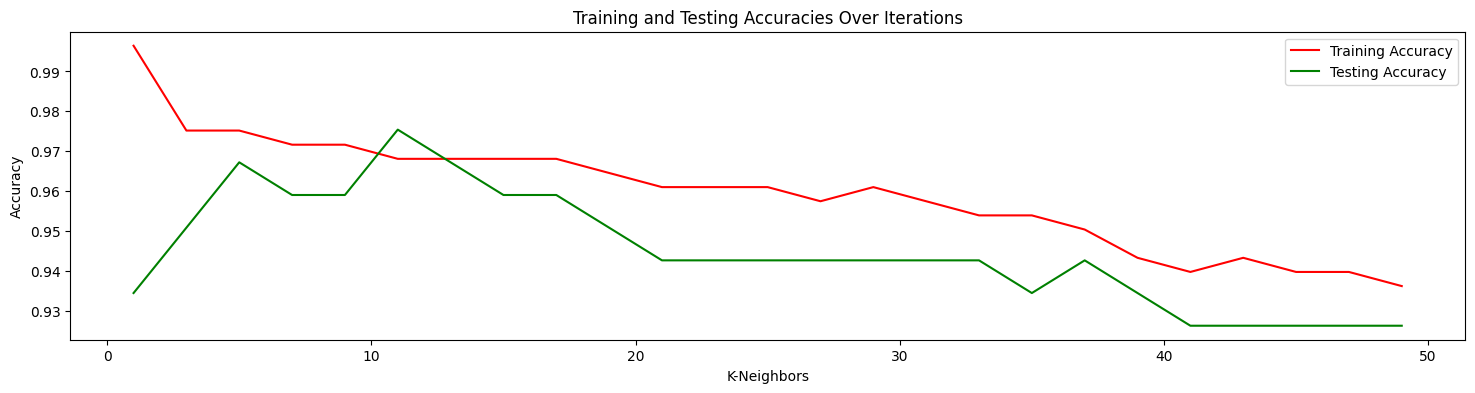

In [22]:
plt.figure(figsize=(18, 4))
plt.plot(k, training_accuracies, label='Training Accuracy', c='red')
plt.plot(k, testing_accuracies, label='Testing Accuracy', c='green')
plt.xlabel('K-Neighbors')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracies Over Iterations')
plt.legend()
plt.show()

**Insight**

- A larger K value can produce a more stable and less variable model because the model gathers information from more neighbors. This makes the model less susceptible to noise in the data.

- A larger K value can increase model bias or lead to misclassification. This is because it overgeneralizes or loses its ability to capture subtle patterns in the data. The model may have difficulty distinguishing between classes in regions with diverse data points.

- As K increases, the complexity and computational time for making predictions also increase, because the algorithm must search for and consider more neighbors.

**Model Interpretation**

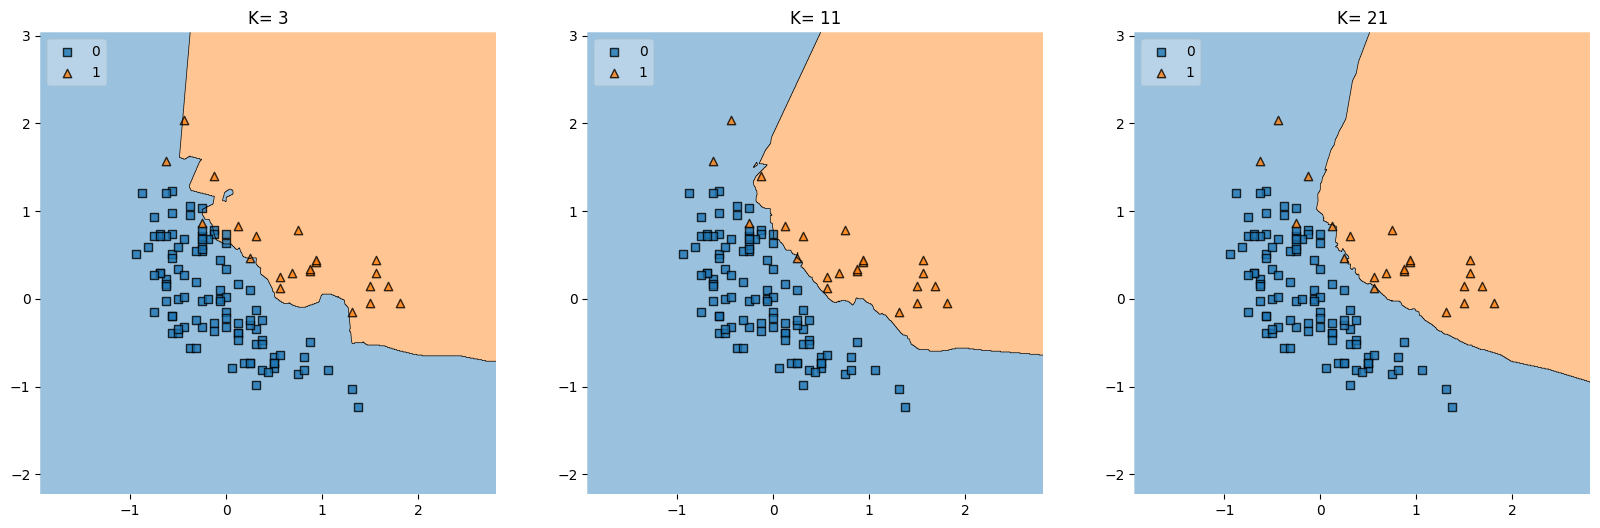

In [23]:
from mlxtend.plotting import plot_decision_regions

# Assuming X has only two features
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for id, k in enumerate([3, 11, 21]):

    # define model
    estimator = KNeighborsClassifier(metric='euclidean', n_neighbors=k)

    # fitting model
    estimator.fit(X_train_scale, y_train)

    # Set title
    axes[id].set_title(f'K= {k}')

    # Plot the decision boundaries
    plot_decision_regions(X_test_scale, y_test.to_numpy(), clf=estimator, legend=2, ax=axes[id])

# Show the plot
plt.show()


**Insight**:

A large K value causes the decision boundary to tend to be smoother and less sensitive to small variations in the data.

**Final Model**

In [24]:
best_estimator = KNeighborsClassifier(n_neighbors=11, metric='euclidean')
best_estimator.fit(X_train_scale, y_train)

y_pred_train = best_estimator.predict(X_train_scale)
y_pred_test = best_estimator.predict(X_test_scale)

print(f'Model accuracy score in train set: {accuracy_score(y_train, y_pred_train)}')
print(f'Model accuracy score in test set: {accuracy_score(y_test, y_pred_test)}')


Model accuracy score in train set: 0.9680851063829787
Model accuracy score in test set: 0.9754098360655737


- Accuracy on the test set: 97.54%
- The KNN model was able to correctly predict wine quality (both Good and Bad) 97.54% of the time.
- Of the 122 bottles of wine, 119 were correctly labeled.

**Predict to New Data**

In [25]:
new_data = pd.DataFrame({
    'alcohol' : [9, 10, 11],
    'density': [0.990, 0.995, 1],
})

new_data

,alcohol,density
0,9,0.990
1,10,0.995
2,11,1.000


In [26]:
# predict to new data
best_estimator.predict(transformer.transform(new_data))

array([0, 0, 1])

In [27]:
transformer.transform(new_data)

array([[-0.625     , -1.22699387],
       [ 0.        ,  0.        ],
       [ 0.625     ,  1.22699387]])

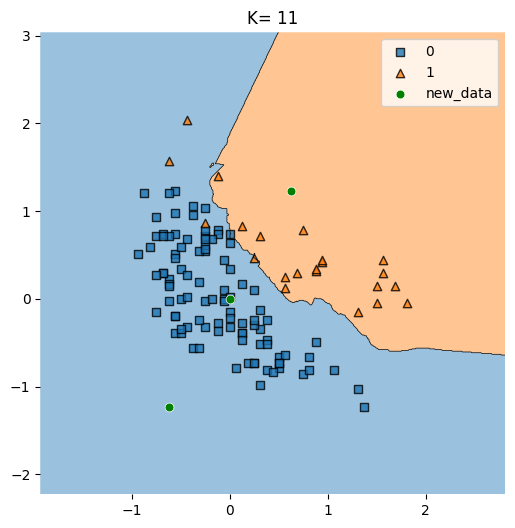

In [28]:
fig, ax = plt.subplots(figsize=(6, 6))

# define model
estimator = KNeighborsClassifier(metric='euclidean', n_neighbors=11)

# fitting model
estimator.fit(X_train_scale, y_train)

# Set title
ax.set_title(f'K= 11')

# Plot the decision boundaries
plot_decision_regions(X_test_scale, y_test.to_numpy(), clf=estimator, legend=2)

# Show scatterplot
sns.scatterplot(x=transformer.transform(new_data)[:,0], y=transformer.transform(new_data)[:, 1], color='green', s=40, label='new_data')

# Show the plot
plt.show()